<a href="https://colab.research.google.com/github/offLaneqq/Data-Science-Camp/blob/main/hometask_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
features_dict = {k : v for k, v in enumerate(iris.target_names)}
print(iris.keys())
print(iris.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)


In [46]:
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [47]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [48]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))
  #print('Neighbors = {}, score = {}'.format(k, metrics.accuracy_score(y_test, y_pred)))
  #print(scores_list)
#print(scores_list)
#score_best = max(scores_list)
#k_best = scores_list.index(score_best)
k_best = max(scores, key=scores.get)
score_best = scores[max(scores, key=scores.get)]
#print(score_best)

print('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 3 , score = 0.9666666666666667


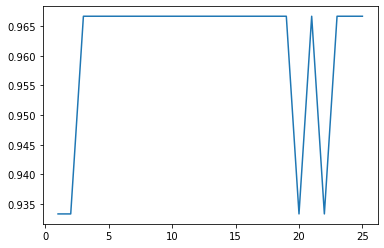

In [16]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)

Оптимальна кількість сусідів в діапазоні [3:19]

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)


y_predict = knn.predict([[5.1, 3.5, 1.4, .2],[6.9, 3.1, 4.9, 1.5]])
print(features_dict[y_predict[0]])
print(features_dict[y_predict[1]])
#5.1               3.5                1.4               0.2        setosa
#6.9               3.1                4.9               1.5        versicolor

setosa
versicolor


# Synthetic dataset

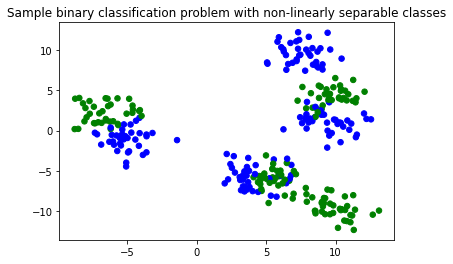

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=0)
#print(x_train.shape)
#print(x_test.shape)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  scores[k] = knn.score(X_test_scaled, y_test)
  scores_list.append(knn.score(X_test_scaled, y_test))
  #print('Neighbors = {}, score = {}'.format(k, metrics.accuracy_score(y_test, y_pred)))

k_best = max(scores, key=scores.get)
score_best = scores[max(scores, key=scores.get)]
print('The best k = {} , score = {}'.format(k_best,score_best ))


The best k = 18 , score = 0.95


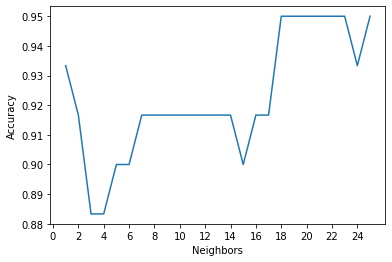

In [58]:
plt.plot(k_range, scores_list)
plt.xticks(np.arange(0, 26, step=2));
plt.xlabel('Neighbors');
plt.ylabel('Accuracy');